Burak KURT - Hüseyin Eren DOĞAN

Dataset link: https://drive.google.com/drive/folders/1eOHG45qfpwz69jvw05fmMXdNQg19L-7V



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
# Concatanate train and test part into single dataFrame.

df_train = pd.read_csv("train_genetic_disorders.csv")
df_test = pd.read_csv("test_genetic_disorders.csv")
print(df_train.index)
print(df_test.index)
df = pd.concat([df_train,df_test],axis=0)
print(df)



RangeIndex(start=0, stop=22083, step=1)
RangeIndex(start=0, stop=9463, step=1)
     Patient Id  Patient Age Genes in mother's side Inherited from father  \
0     PID0x6418          2.0                    Yes                    No   
1     PID0x25d5          4.0                    Yes                   Yes   
2     PID0x4a82          6.0                    Yes                    No   
3     PID0x4ac8         12.0                    Yes                    No   
4     PID0x1bf7         11.0                    Yes                    No   
...         ...          ...                    ...                   ...   
9458        NaN          NaN                    NaN                   NaN   
9459        NaN          NaN                    NaN                   NaN   
9460        NaN          NaN                    NaN                   NaN   
9461        NaN          NaN                    NaN                   NaN   
9462        NaN          NaN                    NaN                   NaN 

1- Data Cleaning

In [3]:
# Dropping irrelevant columns.
irrelevant_columns = ["Patient Id" , "Patient First Name", "Family Name", "Father's name","Institute Name", "Location of Institute","Parental consent","Place of birth"]
df.drop(irrelevant_columns , axis=1 ,inplace=True)

In [4]:
columns_list = df.columns
print(len(df.index))
columns_list
Null_Percentage = {}
print("Percentage of null values in each column.\n")
for i in range(len(columns_list)):
   Null_Percentage[i] = len(df[df[columns_list[i]].isnull()].index) * 100 / len(df.index)
   print(columns_list[i],": ","{:.2f}".format(Null_Percentage[i]))


31546
Percentage of null values in each column.

Patient Age :  8.28
Genes in mother's side :  3.95
Inherited from father :  6.58
Maternal gene :  24.08
Paternal gene :  3.95
Blood cell count (mcL) :  3.95
Mother's age :  22.07
Father's age :  21.98
Status :  3.95
Respiratory Rate (breaths/min) :  19.48
Heart Rate (rates/min :  19.37
Test 1 :  10.35
Test 2 :  10.45
Test 3 :  10.42
Test 4 :  10.44
Test 5 :  10.51
Follow-up :  10.51
Gender :  10.49
Birth asphyxia :  10.47
Autopsy shows birth defect (if applicable) :  7.01
Folic acid details (peri-conceptional) :  10.33
H/O serious maternal illness :  10.45
H/O radiation exposure (x-ray) :  10.44
H/O substance abuse :  10.57
Assisted conception IVF/ART :  10.30
History of anomalies in previous pregnancies :  10.50
No. of previous abortion :  10.46
Birth defects :  10.45
White Blood cell count (thousand per microliter) :  10.43
Blood test result :  10.39
Symptom 1 :  10.46
Symptom 2 :  10.64
Symptom 3 :  10.30
Symptom 4 :  10.36
Symptom 5 

In [5]:
# First of all, we have to delete rows which has null value at Genetic Disorder column because it is our prediction value.

null_Predictions = df[df["Genetic Disorder"].isnull()].index

df.drop(null_Predictions,axis=0,inplace=True)




# Checking percentages again.

columns_list = df.columns
print(len(df.index))
columns_list
Null_Percentage = {}
print("Percentage of null values in each column.\n")
for i in range(len(columns_list)):
   Null_Percentage[i] = len(df[df[columns_list[i]].isna()].index) * 100 / len(df.index)
   print(columns_list[i],": ","{:.2f}%".format(Null_Percentage[i]))

10437
Percentage of null values in each column.

Patient Age :  6.31%
Genes in mother's side :  0.00%
Inherited from father :  1.37%
Maternal gene :  12.12%
Paternal gene :  0.00%
Blood cell count (mcL) :  0.00%
Mother's age :  25.99%
Father's age :  25.23%
Status :  0.00%
Respiratory Rate (breaths/min) :  9.71%
Heart Rate (rates/min :  9.29%
Test 1 :  9.17%
Test 2 :  8.97%
Test 3 :  9.26%
Test 4 :  9.05%
Test 5 :  9.56%
Follow-up :  9.13%
Gender :  9.42%
Birth asphyxia :  9.13%
Autopsy shows birth defect (if applicable) :  4.04%
Folic acid details (peri-conceptional) :  9.06%
H/O serious maternal illness :  9.32%
H/O radiation exposure (x-ray) :  8.82%
H/O substance abuse :  9.77%
Assisted conception IVF/ART :  9.29%
History of anomalies in previous pregnancies :  9.00%
No. of previous abortion :  8.78%
Birth defects :  9.28%
White Blood cell count (thousand per microliter) :  9.17%
Blood test result :  9.07%
Symptom 1 :  9.37%
Symptom 2 :  9.09%
Symptom 3 :  9.06%
Symptom 4 :  9.35%


Patient Age

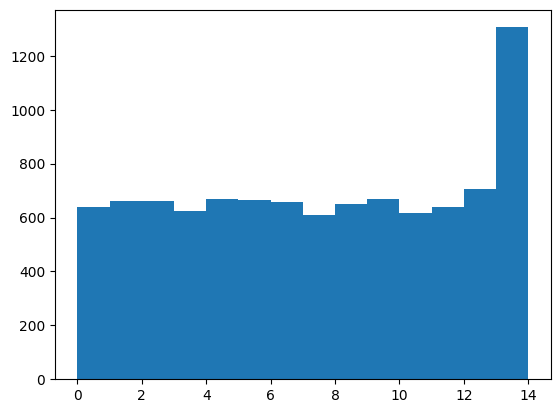

In [6]:
plt.hist(df["Patient Age"] , 14)

plt.show()
# We can fill Null values with median of the values because mean is shifted right more than median.

df["Patient Age"].fillna(df["Patient Age"].median(),inplace=True)


Inherited from father

In [7]:
# Only %1 of data is missing in this column, so we can delete rows which is null.

df.drop(df[df["Inherited from father"].isnull()].index,axis=0,inplace=True)

Maternal Gene


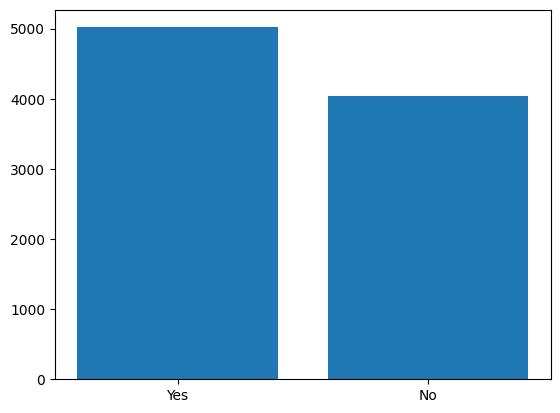

In [8]:
# We have significant percentage of missing values in this column (10%) and it is categorical variable. We can take mode of column or random filling depending on the distribution.

counts = df["Maternal gene"].value_counts()

plt.bar(counts.index, counts)
plt.show()

# We can assume  Maternal gene is distributed equally. We can fill null row values with the above row's value.

df["Maternal gene"].ffill(inplace=True)




Age of Father and Mother

We still have very high null value percentage at Mother and Father age columns (about %25), we can analyze the distribution of the ages, after that we can put related value to null values or we can delete null rows. 

41.828297237712356
34.66967792615868


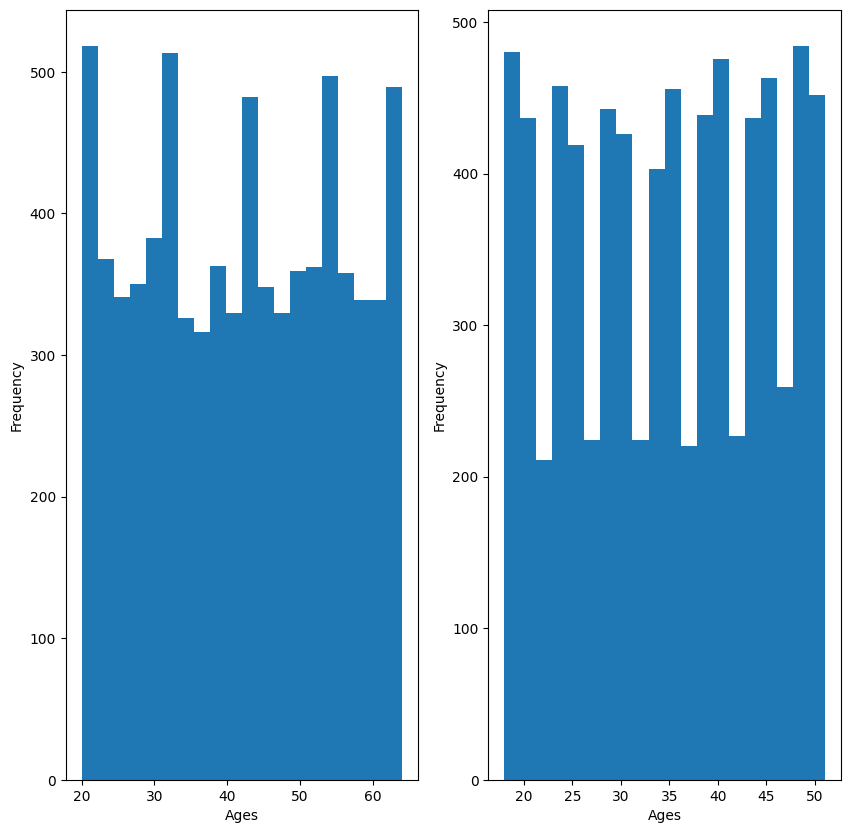

In [9]:
ages_M = df["Mother\'s age"]
ages_F = df["Father\'s age"]

Fig = plt.figure()
Fig.set_size_inches(10 ,10)

plt.subplot(121)

plt.hist(ages_F,20)
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.subplot(122)

plt.hist(ages_M,20)
plt.xlabel("Ages")
plt.ylabel("Frequency")

print(ages_F.mean())
print(ages_M.mean())
plt.show()

# We can use mean value implementation for missing values.

df["Mother\'s age"].fillna(np.floor(ages_M.mean()),inplace=True)
df["Father\'s age"].fillna(np.floor(ages_F.mean()),inplace=True)




Respiratory Rate

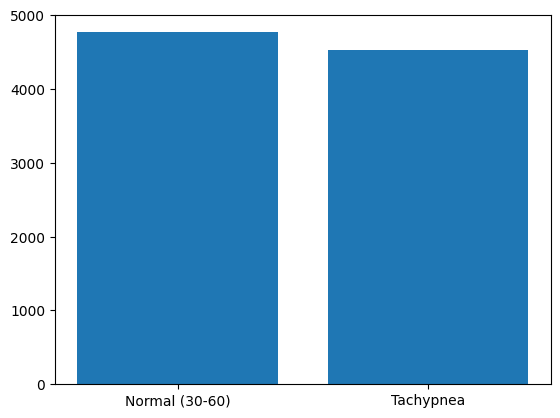

In [10]:
# Same changes are applied here.

Respiratory = df["Respiratory Rate (breaths/min)"].value_counts()
plt.bar(Respiratory.index,Respiratory)
plt.show()

df["Respiratory Rate (breaths/min)"].ffill(inplace=True)


Heart Rate

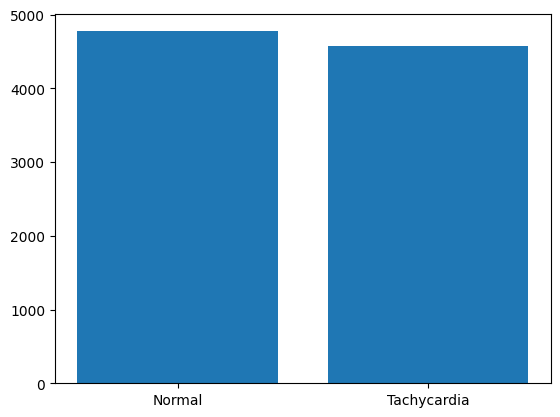

In [11]:
Heart_Rate = df["Heart Rate (rates/min"].value_counts()
plt.bar(Heart_Rate.index,Heart_Rate)
plt.show()

df["Heart Rate (rates/min"].ffill(inplace=True)


Test 1

In [12]:
print(df["Test 1"].unique()) # Not a single column is 1 , so we can fill null values with 0.

df["Test 1"].fillna(0)



[ 0. nan]


9463     0.0
9464     0.0
9465     0.0
9466     0.0
9467     0.0
        ... 
21006    0.0
21007    0.0
21008    0.0
21009    0.0
21010    0.0
Name: Test 1, Length: 10294, dtype: float64

Test 2-5

In [13]:
print(df["Test 2"].unique())
print(df["Test 3"].unique())
print(df["Test 4"].unique())
print(df["Test 5"].unique())

# All the values are same in the each test. This test attributes are useless for prediction so we can drop them.

columns = ["Test 1" , "Test 2", "Test 3", "Test 4","Test 5"]

df.drop(columns,axis=1,inplace=True)

[ 0. nan]
[ 0. nan]
[ 1. nan]
[ 0. nan]


Follow-Up

['Low' 'High' nan]


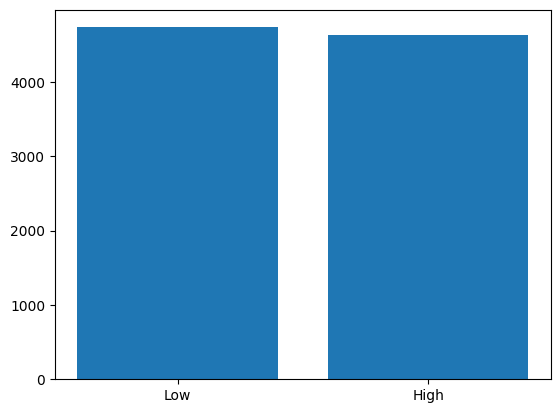

In [14]:
print(df["Follow-up"].unique())

follow = df["Follow-up"].value_counts()
plt.bar(follow.index,follow)
plt.show()

df["Follow-up"].ffill(inplace=True)

Gender

['Female' 'Male' 'Ambiguous' nan]


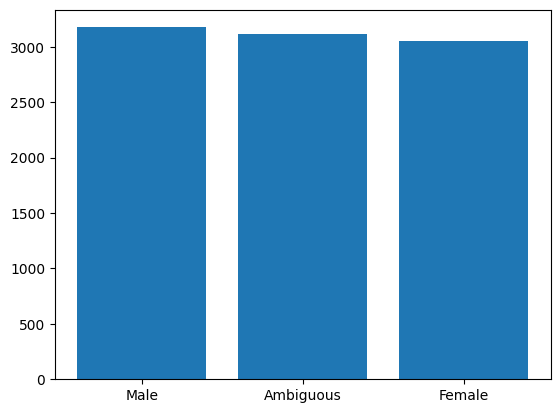

In [15]:
print(df["Gender"].unique())


gender = df["Gender"].value_counts()
plt.bar(gender.index,gender)
plt.show()

df["Gender"].ffill(inplace=True)

Birth asphyxia

['Yes' 'No' 'Not available' 'No record' nan]


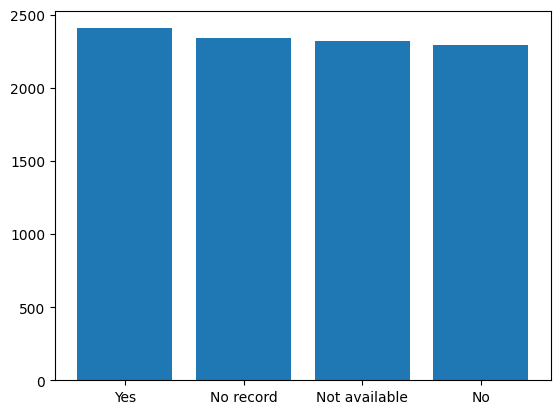

In [16]:
print(df["Birth asphyxia"].unique())
birth = df["Birth asphyxia"].value_counts()
plt.bar(birth.index,birth)
plt.show()

## Too much missing value in that column(also %10 of the columns is null). We have to drop that column for better accuracy.

df.drop(["Birth asphyxia"],axis=1,inplace=True)

Autopsy shows birth defect (if applicable)

['No' 'Not applicable' 'Yes' 'None' nan]


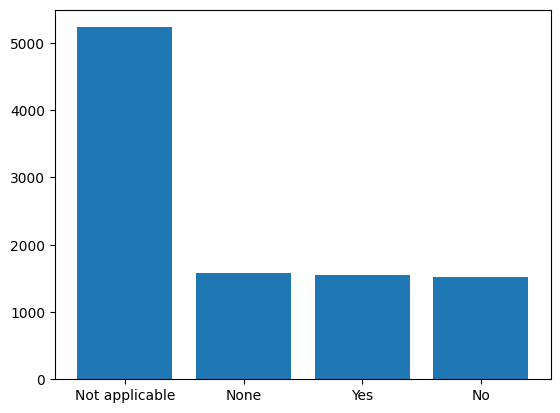

In [17]:
# There is too much value contains none or not applicable, so we have to remove this column.

print(df["Autopsy shows birth defect (if applicable)"].unique())

autopsy = df["Autopsy shows birth defect (if applicable)"].value_counts()
plt.bar(autopsy.index,autopsy)
plt.show()

df.drop("Autopsy shows birth defect (if applicable)",axis=1,inplace=True)

Folic acid details (peri-conceptional)

['No' 'Yes' nan]


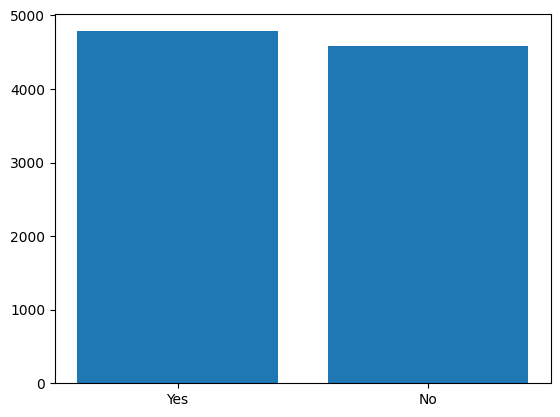

In [18]:
print(df["Folic acid details (peri-conceptional)"].unique())
folic = df["Folic acid details (peri-conceptional)"].value_counts()

plt.bar(folic.index,folic)
plt.show()

df["Folic acid details (peri-conceptional)"].ffill(inplace=True)



H/O serious maternal illness

['No' 'Yes' nan]


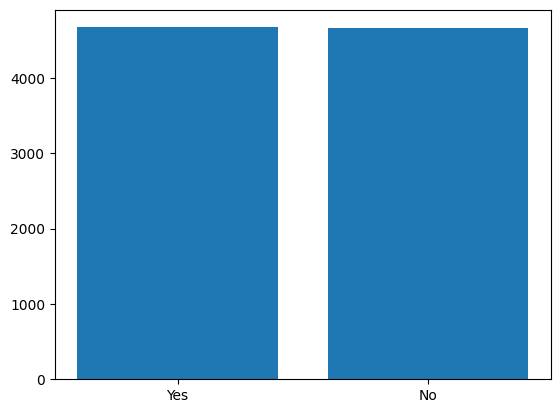

In [19]:
print(df["H/O serious maternal illness"].unique())
ilness = df["H/O serious maternal illness"].value_counts()
plt.bar(ilness.index,ilness)
df["H/O serious maternal illness"].ffill(inplace=True)
df.loc[df["H/O serious maternal illness"] == "Not applicable" , "H/O serious maternal illness"] = "No"


H/O radiation exposure (x-ray) 

['-' 'Not applicable' nan 'No' 'Yes']


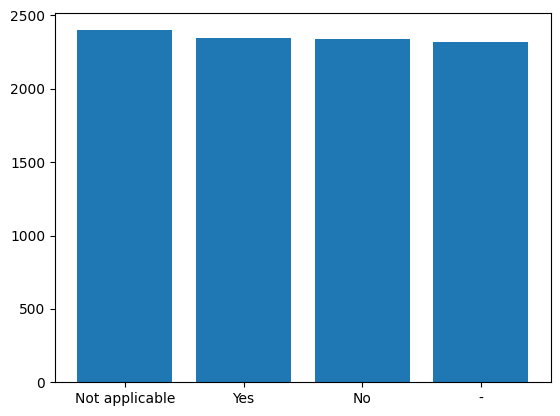

In [20]:
print(df["H/O radiation exposure (x-ray)"].unique())

x_ray = df["H/O radiation exposure (x-ray)"].value_counts()
plt.bar(x_ray.index,x_ray)
plt.show()
df["H/O radiation exposure (x-ray)"].ffill(inplace=True)
df.loc[df["H/O radiation exposure (x-ray)"] == "Not applicable" , "H/O radiation exposure (x-ray)"] = "No"
df.loc[df["H/O radiation exposure (x-ray)"] == "-" , "H/O radiation exposure (x-ray)"] = "No"



H/O substance abuse 

In [21]:
print(df["H/O substance abuse"].unique())
df["H/O substance abuse"].ffill(inplace=True)
df.loc[df["H/O substance abuse"] == "Not applicable" , "H/O substance abuse"] = "No"
df.loc[df["H/O substance abuse"] == "-" , "H/O substance abuse"] = "No"

['Not applicable' 'Yes' 'No' nan '-']


Assisted conception IVF/ART

In [22]:
print(df["Assisted conception IVF/ART"].unique())
df["Assisted conception IVF/ART"].ffill(inplace=True)

['No' 'Yes' nan]


History of anomalies in previous pregnancies

In [23]:
print(df["History of anomalies in previous pregnancies"].unique())
df["History of anomalies in previous pregnancies"].ffill(inplace=True)



['Yes' nan 'No']


No. of previous abortion

In [24]:
print(df["No. of previous abortion"].unique())
df.loc[df["No. of previous abortion"] == "Not applicable", "No. of previous abortion"] = 0
df["No. of previous abortion"].fillna(0,inplace=True)


[ 3.  4.  0.  1.  2. nan]


Birth defects

['Multiple' nan 'Singular']


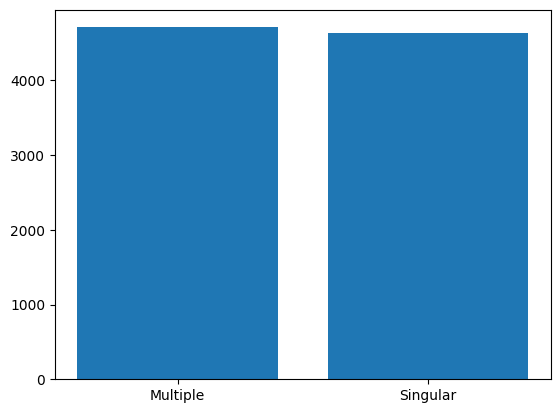

In [25]:
print(df["Birth defects"].unique())
#df.loc[df["Birth defects"] == 0 , "Birth defects"] ="None"
defect = df["Birth defects"].value_counts()
plt.bar(defect.index,defect)
plt.show()

df["Birth defects"].fillna("None",inplace=True)




White Blood cell count (thousand per microliter)

7.481725891187032


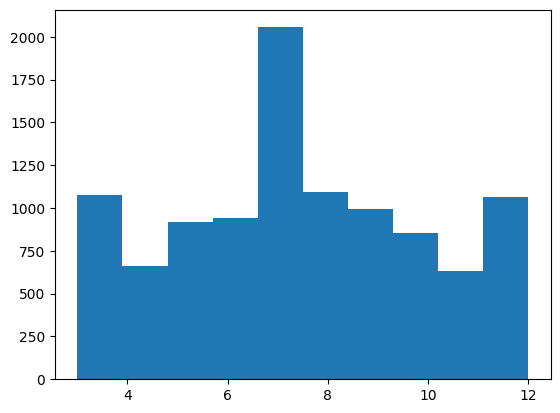

In [26]:

unique_values = df["White Blood cell count (thousand per microliter)"].values

numeric_values =[]
for i in unique_values:
    if isinstance(i, float) and not math.isnan(i):
        pass
        numeric_values.append(i)

df.loc[df["White Blood cell count (thousand per microliter)"] == "None", "White Blood cell count (thousand per microliter)"] = np.mean(numeric_values)
df["White Blood cell count (thousand per microliter)"].fillna(np.mean(numeric_values),inplace= True)
print(np.mean(numeric_values))




plt.hist(df["White Blood cell count (thousand per microliter)"],10)

plt.show()





Blood test result

['slightly abnormal' 'inconclusive' 'normal' nan 'abnormal']


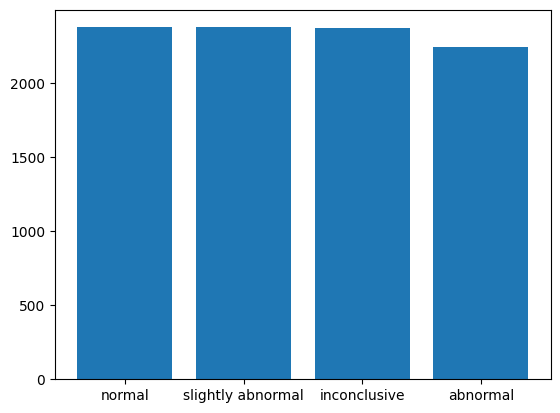

In [27]:
print(df["Blood test result"].unique())

results = df["Blood test result"].value_counts()
plt.bar(results.index,results)
plt.show()

df["Blood test result"].ffill(inplace=True)


Symptom Attributes

In [28]:
print(df["Symptom 1"].unique())
print(df["Symptom 2"].unique())
print(df["Symptom 3"].unique())
print(df["Symptom 4"].unique())
print(df["Symptom 5"].unique())

print("*******************")
symp1 = df["Symptom 1"].value_counts()
print(symp1)
print("*******************")
symp2 = df["Symptom 2"].value_counts()
print(symp2)
print("*******************")
symp3 = df["Symptom 3"].value_counts()
print(symp3)
print("*******************")
symp4 = df["Symptom 4"].value_counts()
print(symp4)
print("*******************")
symp5 = df["Symptom 5"].value_counts()
print(symp5)
print("*******************")

df["Symptom 1"].ffill(inplace= True)
df["Symptom 2"].ffill(inplace= True)
df["Symptom 3"].ffill(inplace= True)
df["Symptom 4"].ffill(inplace= True)
df["Symptom 5"].ffill(inplace= True)

[1.0 0.0 nan]
[0.0 1.0 nan]
[1.0 0.0 nan]
[1.0 0.0 nan]
[0.0 1.0 nan]
*******************
1.0    5571
0.0    3766
Name: Symptom 1, dtype: int64
*******************
1.0    5195
0.0    4170
Name: Symptom 2, dtype: int64
*******************
1.0    5047
0.0    4323
Name: Symptom 3, dtype: int64
*******************
0.0    4755
1.0    4576
Name: Symptom 4, dtype: int64
*******************
0.0    4992
1.0    4317
Name: Symptom 5, dtype: int64
*******************


CHECKING OUTLIERS

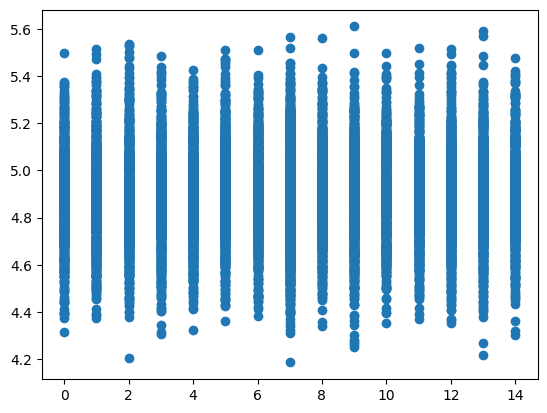

<AxesSubplot:>

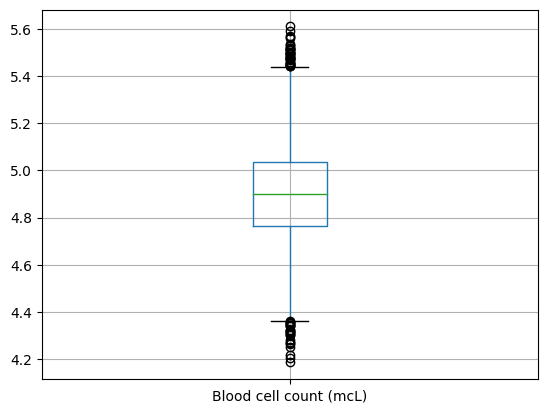

In [29]:
# Blood cell count and White blood cell amount are continuous numeric variables in data

plt.scatter(df["Patient Age"],df["Blood cell count (mcL)"])
plt.show()

df.boxplot("Blood cell count (mcL)")

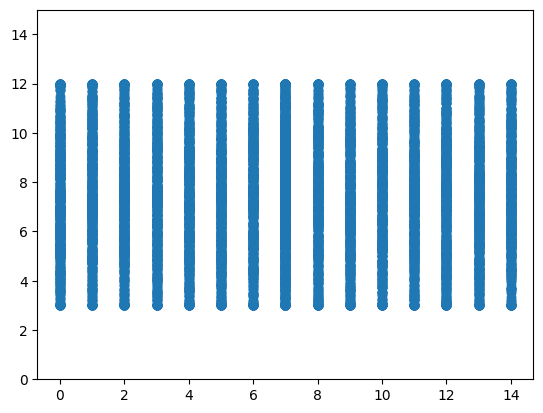

<AxesSubplot:>

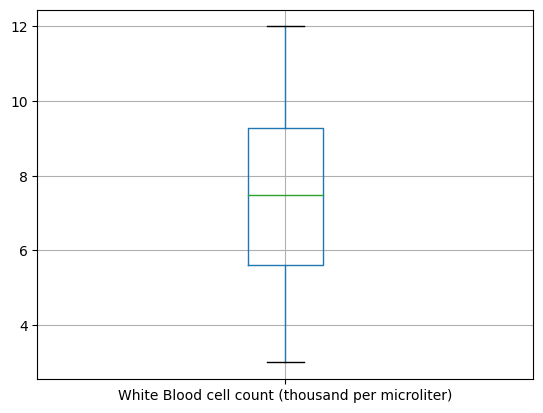

In [30]:
plt.scatter(df["Patient Age"],df["White Blood cell count (thousand per microliter)"])
plt.ylim([0,15])
plt.show()

df.boxplot("White Blood cell count (thousand per microliter)")

In [31]:
for column in df.columns:
    if type(df[column].values[0]) == str:
        print(column, " : " , df[column].unique()) 


Genes in mother's side  :  ['No' 'Yes']
Inherited from father  :  ['Yes' 'No']
Maternal gene  :  ['Yes' 'No']
Paternal gene  :  ['No' 'Yes']
Status  :  ['Deceased' 'Alive']
Respiratory Rate (breaths/min)  :  ['Normal (30-60)' 'Tachypnea']
Heart Rate (rates/min  :  ['Normal' 'Tachycardia']
Follow-up  :  ['Low' 'High']
Gender  :  ['Female' 'Male' 'Ambiguous']
Folic acid details (peri-conceptional)  :  ['No' 'Yes']
H/O serious maternal illness  :  ['No' 'Yes']
H/O radiation exposure (x-ray)  :  ['No' 'Yes']
H/O substance abuse  :  ['No' 'Yes']
Assisted conception IVF/ART  :  ['No' 'Yes']
History of anomalies in previous pregnancies  :  ['Yes' 'No']
Birth defects  :  ['Multiple' 'None' 'Singular']
Blood test result  :  ['slightly abnormal' 'inconclusive' 'normal' 'abnormal']
Genetic Disorder  :  ['Mitochondrial genetic inheritance disorders'
 'Single-gene inheritance diseases'
 'Multifactorial genetic inheritance disorders']
Disorder Subclass  :  ['Mitochondrial myopathy' 'Leigh syndrome' 

In [32]:
df.replace({"Yes","No"},{1,0},inplace=True)
df.replace({"Deceased","Alive"},{0,1},inplace=True)
df.replace({"Normal (30-60)", "Tachypnea"},{1,0},inplace=True)
df.replace({"Normal","Tachycardia"},{1,0},inplace=True)
df.replace({"Low","High"},{0,1},inplace=True)
df.replace({"None","Singular","Multiple"},{0,1,2},inplace=True)
# Dummy variable for Gender
# Dummy variable for Blood test result
dum_gender = pd.get_dummies(df["Gender"])
dum_result = pd.get_dummies(df["Blood test result"])
dum_Classes = pd.get_dummies(df["Genetic Disorder"])


df.drop("Gender",axis=1,inplace=True)
df.drop("Blood test result",axis=1,inplace=True)
df.drop("Genetic Disorder",axis=1,inplace=True)


df = pd.concat([df,dum_gender,dum_result,dum_Classes],axis=1)

print(df.columns)



Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Disorder Subclass',
       'Ambiguous', 'Female', 'Male', 'abnormal', 'inconclusive', 'normal',
       'slightly abnormal', 'Mitochondrial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'],
      dtype='object')


Data Preprocessing

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

x = df.drop(["Mitochondrial genetic inheritance disorders","Multifactorial genetic inheritance disorders","Single-gene inheritance diseases","Disorder Subclass"],axis=1)
y = df[["Mitochondrial genetic inheritance disorders","Multifactorial genetic inheritance disorders","Single-gene inheritance diseases"]]


scaler = StandardScaler()
x = scaler.fit_transform(x) 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)


3- DATA EXPLORATION and ANALYSIS

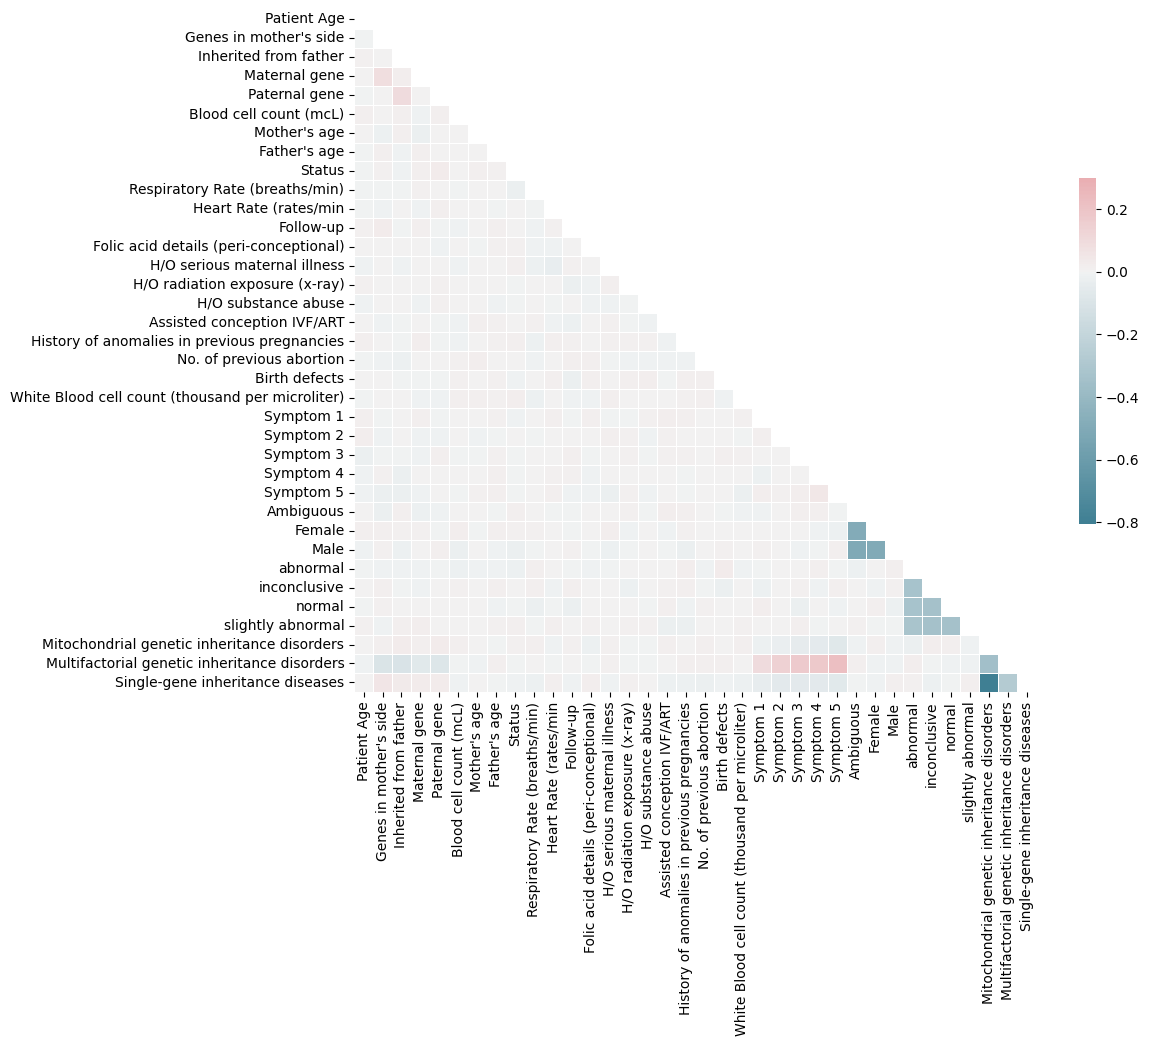

In [34]:

corr = df.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


## Maternal - Genes in mother's side and  Paternal - Inherited from father pairs are most correlated variables. Since data mostly contains binary attributes, it is hard to understand correlation from heatmap.

(4.0, 6.0)

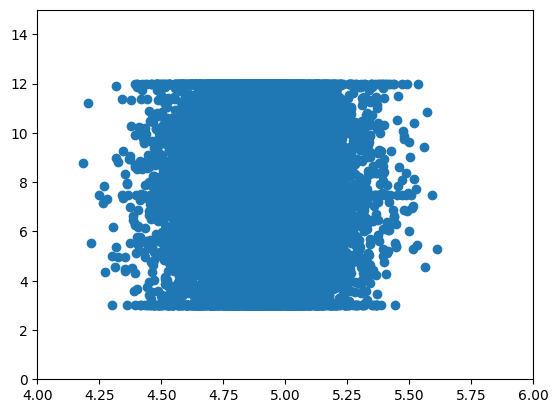

In [35]:
# Blood Cell Count - White Blood Cell count  (2 continuous variable)

plt.scatter(df["Blood cell count (mcL)"],df["White Blood cell count (thousand per microliter)"])
plt.ylim((0,15))
plt.xlim((4,6))



3.1- Clustering Analysis

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

def clustering(df, feature1, feature2):
    data = df[[feature1, feature2]]
    n_clusters = find_k(data, 10)
    build_plot(data, n_clusters)

def find_k(data, max_k):
    k_values = [i for i in range(1, max_k + 1)]
    inertias = []
    for k in k_values:
        km = KMeans(n_clusters = k)
        km.fit(data)
        inertias.append(km.inertia_)
    
    plt.figure(figsize=(10,2))
    plt.xlabel("Values of k")
    plt.ylabel("Inertia")
    plt.plot(k_values, inertias, 'o-')
    plt.show()
    
    kn = KneeLocator(k_values, inertias, curve="convex", direction="decreasing")
    print(f'\nBest k value is: {kn.elbow}')
    return kn.elbow

def build_plot(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)

    km_cluster_labels = kmeans.fit_predict(data)
    km_silhouette_avg = silhouette_score(data, km_cluster_labels)
    km_silhouette_scores = silhouette_samples(data, kmeans.labels_)
    
    fig, ax = plt.subplots(1,2, figsize = (15,6))

    ax[0].scatter(x = data.iloc[:,:1], y = data.iloc[:,1:], c=kmeans.labels_)
    ax[0].set_title("K-Means Clusters")

    ax[1].scatter(range(len(km_silhouette_scores)), km_silhouette_scores)
    ax[1].set_title("Silhouette Scores")
    ax[1].set_xlabel("Data points")
    ax[1].set_ylabel("Silhouette scores")
    ax[1].set_yticks(np.arange(-1,1.1, step= 0.1))
    
    plt.show()
    
    print(f"Average Silhouette Score: {km_silhouette_avg.round(4)}")
    

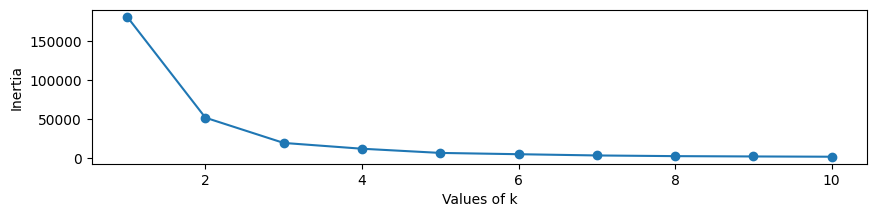


Best k value is: 3


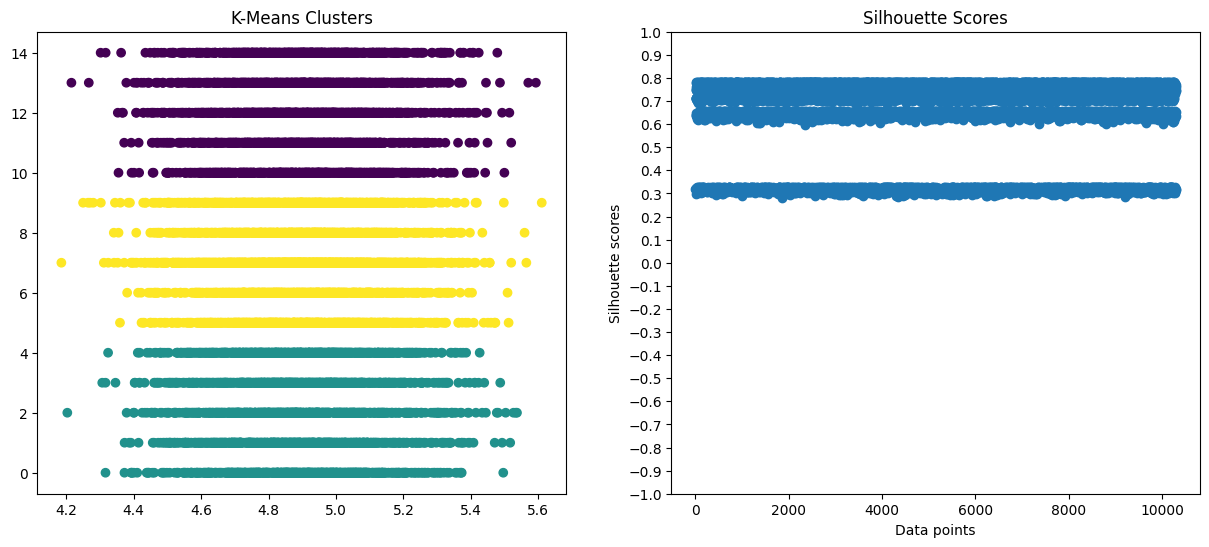

Average Silhouette Score: 0.6137


In [37]:
clustering(df,'Blood cell count (mcL)', 'Patient Age')

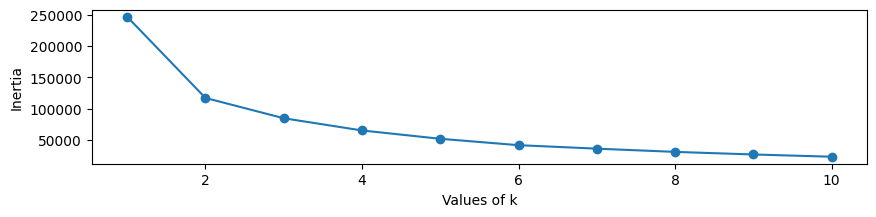


Best k value is: 3


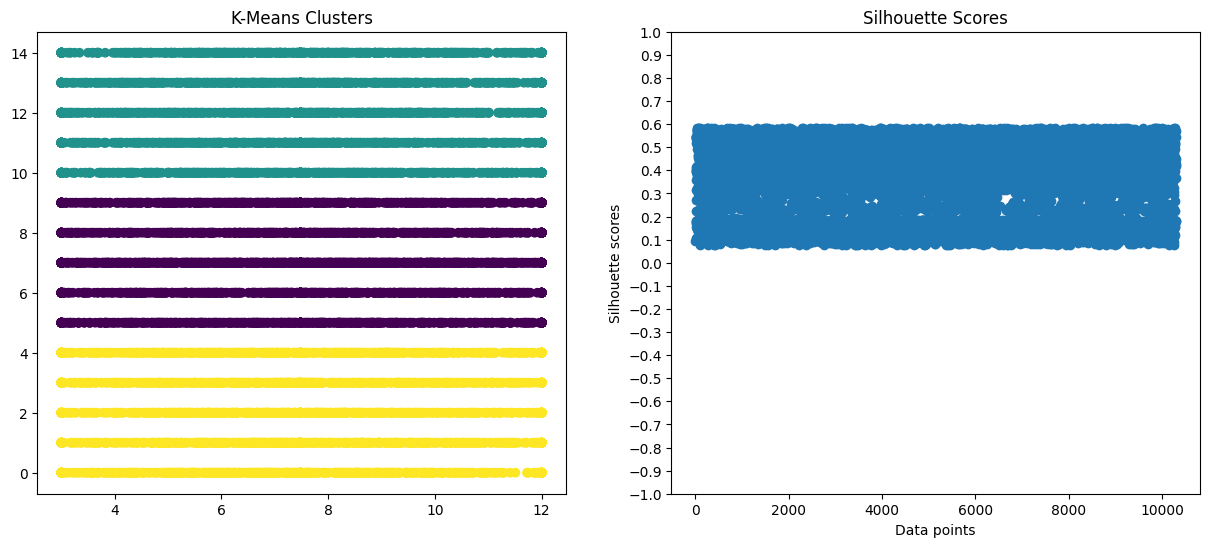

Average Silhouette Score: 0.3657


In [38]:
clustering(df,'White Blood cell count (thousand per microliter)', 'Patient Age')

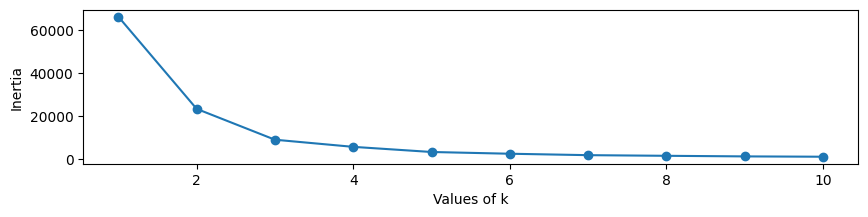


Best k value is: 3


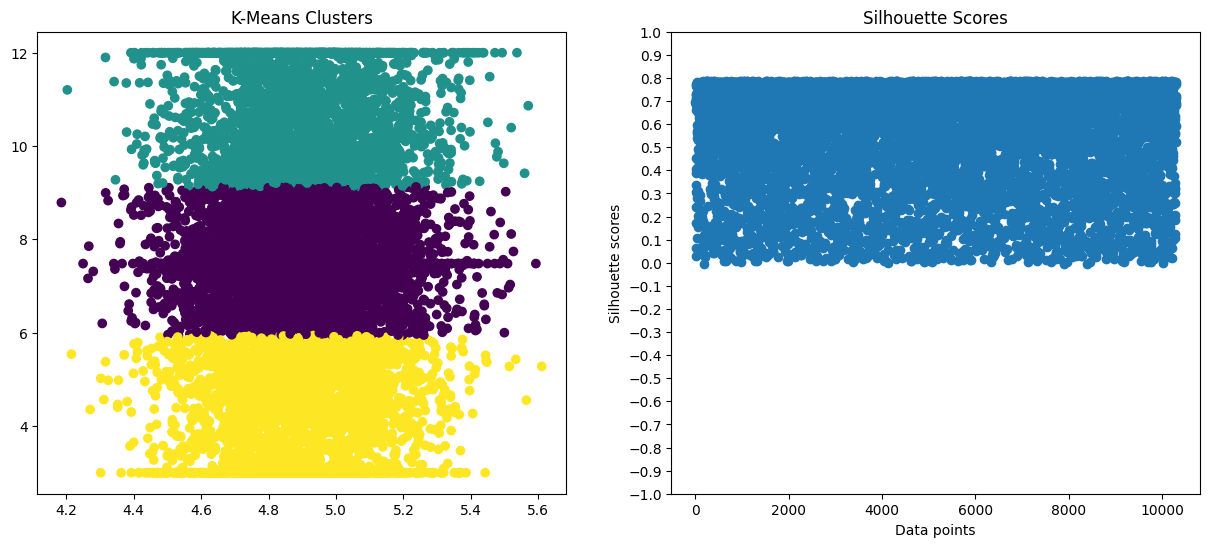

Average Silhouette Score: 0.5807


In [39]:
clustering(df,'Blood cell count (mcL)', 'White Blood cell count (thousand per microliter)')

4- Predictive Modelling

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix ,plot_confusion_matrix,roc_curve,mean_squared_error
from sklearn.model_selection import cross_val_score

def convertResultTo1D(data):
    oneDlist= []
    for i in data:
        if i[0] ==1:
            oneDlist.append(1)
        elif i[1] ==1:
            oneDlist.append(2)
        else:
            oneDlist.append(3)

    return oneDlist

def EvaluateResults(model,pred,y_test):
    pred = convertResultTo1D(pred)
    accuracy = cross_val_score(model,x,y,cv=10)
    print("10-Fold cross validation score of model: " ,accuracy.mean(),"\n")
    print(classification_report(y_test,pred))

    print("\n")
    conf=confusion_matrix(y_test,pred,labels=[1,2,3])

    
    sns.heatmap(conf,annot=True)
    plt.show()
    print("\n")
    print(conf)



    
y_test = convertResultTo1D(y_test.values)


4.1 - Logistic Regression

10-Fold cross validation score of model:  0.34175210167284664 

              precision    recall  f1-score   support

           1       0.58      0.68      0.63      1039
           2       0.58      0.15      0.24       226
           3       0.39      0.38      0.39       794

    accuracy                           0.51      2059
   macro avg       0.52      0.41      0.42      2059
weighted avg       0.51      0.51      0.49      2059





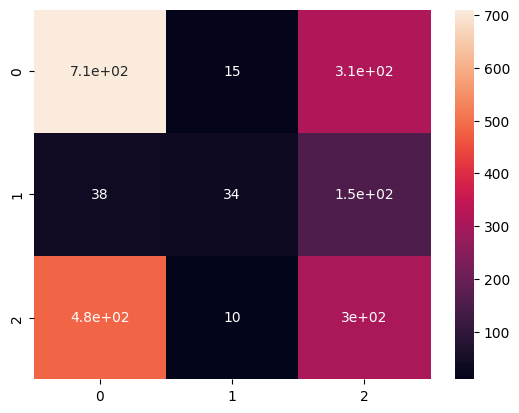



[[710  15 314]
 [ 38  34 154]
 [481  10 303]]


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# No parameter to estimate.
LR = LogisticRegression()
OvR = OneVsRestClassifier(LR)
OvR.fit(x_train,y_train)
pred = OvR.predict(x_test)

accLogistic = accuracy_score(y_test,convertResultTo1D(pred))
EvaluateResults(OvR,pred,y_test)



4.2 Random Forest

4.2.1 Parameter Estimation

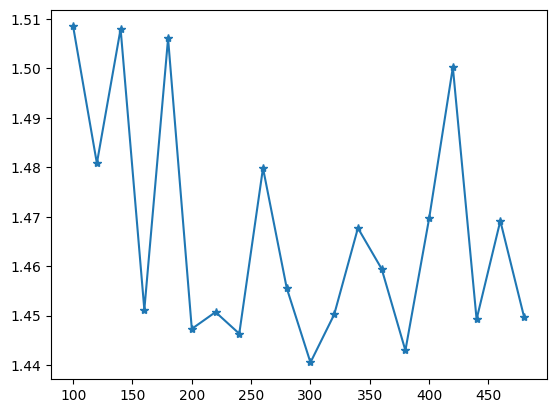

In [42]:
from sklearn.ensemble import RandomForestClassifier
trees = []
errors = []
min_i = 500
min_error = 10000
for i in range(100,500,20):
    RFC = RandomForestClassifier(n_estimators= i)
    RFC.fit(x_train,y_train)
    pred = convertResultTo1D(RFC.predict(x_test))
    mse = mean_squared_error(y_test,pred)
    trees.append(i)
    errors.append(mse)
    if(mse < min_error):
        min_error = mse
        min_i = i



plt.plot(trees,errors,marker="*")
plt.show()

# This code part takes 1-2 minute to run.


Since features and datas selected randomly in each iteration, it can not be possible to say exactly one number is best for tree numbers. We only know that best number is which gives the lowest error.

4.2.2 Model evaluation

10-Fold cross validation score of model:  0.41985375564927774 

              precision    recall  f1-score   support

           1       0.63      0.71      0.67      1039
           2       1.00      0.01      0.02       226
           3       0.46      0.50      0.48       794

    accuracy                           0.56      2059
   macro avg       0.69      0.41      0.39      2059
weighted avg       0.60      0.56      0.52      2059





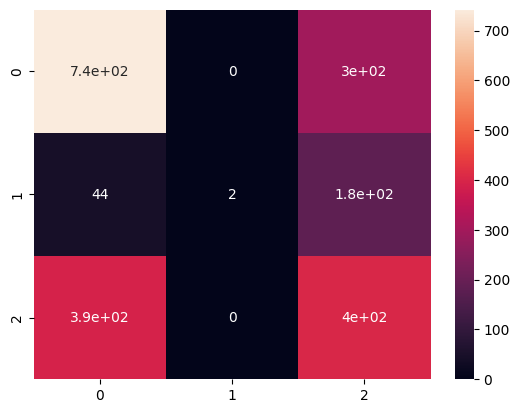



[[742   0 297]
 [ 44   2 180]
 [394   0 400]]


In [43]:

RFC = RandomForestClassifier(n_estimators= min_i)
RFC.fit(x_train,y_train)
pred = RFC.predict(x_test)
accRFC= accuracy_score(y_test,convertResultTo1D(pred))
EvaluateResults(RFC,pred,y_test)

# This code part takes 1-2 minute to run.

4.3 KNN Classifier

4.3.1 Parameter Estimation

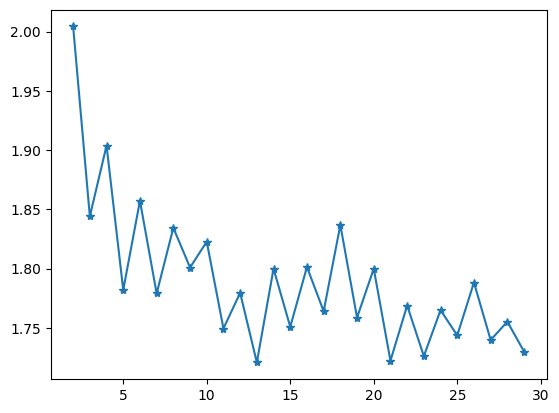

In [44]:
from sklearn.neighbors import KNeighborsClassifier

neighbours = []
errors = []
min_i = 30
min_error = 10000
for i in range(2,30):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    pred = convertResultTo1D(KNN.predict(x_test))
    mse = mean_squared_error(y_test,pred)
    neighbours.append(i)
    errors.append(mse)
    if(mse < min_error):
        min_error = mse
        min_i = i



plt.plot(neighbours,errors,marker="*")
plt.show()

Selecting for neighbour number process is same with decision tree. We want to find optimal k number which gives lowest error.

4.3.2 Model evaluation

10-Fold cross validation score of model:  0.39547331276477304 

              precision    recall  f1-score   support

           1       0.55      0.61      0.58      1039
           2       0.47      0.03      0.06       226
           3       0.40      0.46      0.43       794

    accuracy                           0.49      2059
   macro avg       0.47      0.37      0.36      2059
weighted avg       0.49      0.49      0.46      2059





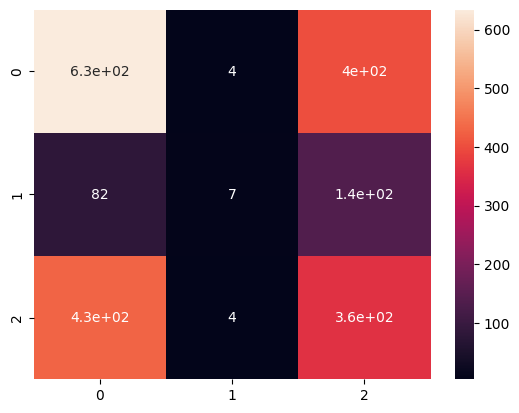



[[634   4 401]
 [ 82   7 137]
 [428   4 362]]


In [45]:
KNN = KNeighborsClassifier(min_i)

KNN.fit(x_train,y_train)
pred = KNN.predict(x_test)
accKNN = accuracy_score(y_test,convertResultTo1D(pred))
EvaluateResults(KNN,pred,y_test)


5- Accuracy Comparison and Final Comments

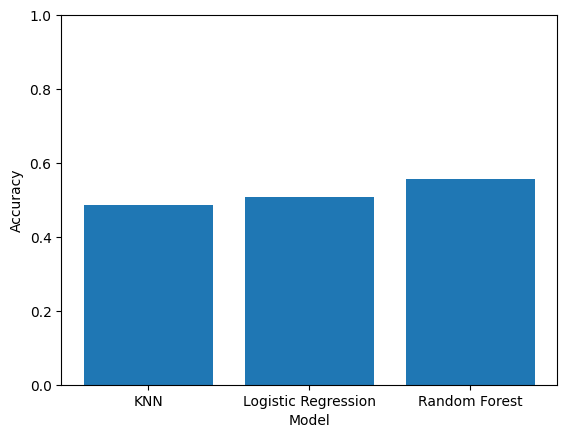

In [46]:
plt.bar(["KNN","Logistic Regression","Random Forest"],[accKNN,accLogistic,accRFC])

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

Final Comment:


Accuracy is changing between %40 - %60 for all models. Random forest algorithm is better than others for accuracy metric. However, their accuracies are very low  and sometimes they may be worse than random predictor. We think that our data is the reason for this accuracies. Data has many missing values and mostly contains binary categorical (Yes/No) variables. When we were dealing with missing categorical data, we tried to avoid deleting data, so we replaced missing point with the value above. It can be misleading for models.